# **Stokes and Supremizer Stabilization**
In a Stokes problem, in order to guarantee the well-posedness, we have to prove:

1. The coercivity of the grad-grad form over the kernel of the divergence operator.
2. The divergence operator has to verify the inf-sup stability condition, namely:
$$
\beta_{\delta}(\mu) = \inf_{\mathsf q \neq 0} \sup_{\mathsf v \neq 0} 
\frac{\mathsf q^T B \mathsf v}{\vert \vert \mathsf q \vert \vert \vert \vert \mathsf v \vert \vert } > 0.
$$ 

Where $q^TBv = <Bv, q> = b(v.q)$, in which $ b(v.q) = \int div(u)q = 0, \forall q$.

**NB** The cohercivity property in a space is hereditated for all the subspaces of the original one. For the inf-sup stabiality conditions, this property doesn't hold! _(See Lecture Notes 12 to all the mathematical part related to this expansion of the inf-sup stability)_.

The inf-sup relation means that $\mathsf{ker}(B^T) = \{0\}$ (no pressures different from zero let the divergence to be null).

In the FE setting, the above relation is verified with some special combinations of spaces, like the **Taylor-Hood** approximation: namely $\mathbb P^2$ elements for velocity and $\mathbb P^1$ for pressure (also called $\mathbb P^2- \mathbb P^1$ elements). --> We always use this approximation.

How does it translates in the reduced framework?

Property 1. is directly inherited from the FE discretization, and property 2. reads:

$$
\beta_{N}(\mu) = \inf_{\mathsf q_{N_p} \neq 0} \sup_{\mathsf v_{N_u} \neq 0} 
\frac{\mathsf q_{N_p}^T B_{N} \mathsf v_{N_u}}{\vert \vert \mathsf q \vert \vert \vert \vert \mathsf v \vert \vert } > 0.
$$ 

It is clear that, in general, for reduced problems, the inf-sup condition is not fulfilled. Let us consider a reduced basis $\{\phi_i\}_{i=1}^{N_u}$ and $\{\psi_i\}_{i=1}^{N_p}$, for velocity and pressure, respectively. 
The matrix $[B_N]_{kj} = b(\phi_k, \psi_j) = 0$, since the velocity basis functions are conbination of weakly-divergence-free snapshots.

Namely $\mathsf{ker}(B_N^T) \neq \{0\}$, indeed, it is definetely larger, since every pressure basis is actually an element of the kernel!

To avoid this problem we use _supremizer stabilization_. 

From now on, we suppose $N_p = N_u = N$, just for a simpler presentation of the topic.

The trick is to enrich the velocity space with the following vector field $\mathsf s^{\mu}$ for each pressure mode and each related parametric instance:
$$
\mathbb X_u \mathsf s^{\mu}(\overline{\psi}_j) = B^T\overline{\psi}_j,
$$
where $\overline{\psi}_j$ is the FE vector related to the pressure basis. The vector field $\mathsf s^{\mu}(q)$ is called **supremizer** and it is defined as

$$
\mathsf  s^{\mu}(q) = {\arg \sup}_{\mathsf v \neq 0} 
\frac{\mathsf q_N^T B \mathsf v}{\vert \vert \mathsf v \vert \vert }.
$$

**DIM**. Indeed, in this way, we can prove the following relation remembering that the inf in a larger spaces is lower that the one in a smaller space. Moreover, we can use the supermizer remembering the definition and using the reduced version of the matrix of the velocity and the pressure:

$$
0 < \beta_{\delta}(\mu)  = \inf_{\mathsf q \neq 0} \sup_{\mathsf v \neq 0} 
\frac{\mathsf q^T B \mathsf v}{\vert \vert \mathsf q \vert \vert \vert \vert \mathsf v \vert \vert } \leq 
\inf_{\mathsf q_N \neq 0} \sup_{\mathsf v \neq 0} 
\frac{(\mathbb B_p\mathsf q_N)^T B \mathsf v}{\vert \vert \mathbb B_p\mathsf q_N \vert \vert \vert \vert \mathsf v \vert \vert } =
\inf_{\mathsf q_N \neq 0} 
 \frac{(\mathbb B_p\mathsf q_N)^T B \mathsf s^{\mu}(\mathbb B_p\mathsf q_N)}{\vert \vert \mathbb B_p\mathsf q_N \vert \vert \vert \vert \mathsf s^{\mu}(\mathbb B_p\mathsf q_N)\vert \vert } =
 \inf_{\mathsf q_N \neq 0} \sup_{\mathsf v_N \neq 0} 
\frac{\mathsf q_N^T\mathbb B_p^T B  \mathbb B_u \mathsf v_N}{\vert \vert \mathbb B_p\mathsf q_N \vert \vert \vert \vert \mathbb B_u \mathsf v_N \vert \vert } = \inf_{\mathsf q_N \neq 0} \sup_{\mathsf v_N \neq 0} 
\frac{\mathsf q_N^T B_N\mathsf v_N}{\vert \vert \mathsf q_N \vert \vert \vert \vert \mathsf v_N \vert \vert} = \beta_{N}(\mu).
$$ 

Hence, we obtain: $0 < \beta_{\delta}(\mu) \leq \beta_{N}(\mu)$, that we can obtain thanks to the idea of elarging the space with the element that makes the inf-sup condition holds.

Let us understand how to exploit these notions on the creation of the reduced space.

**Be careful**: you can see that the supremizer stabilization depends _online_ on the FOM dimension $N_{\delta}$. Here, we use the same dimension for the velocity and the pressure, but in general, can be different!

**Drowback!**. For each new pressure, you have a new supermizer, so online you have no garantee (from a theorem) that you have B, maybe you have to compute B again by enlarging the space so that the inf-sup stability holds.

In [1]:
import sys
sys.path.append('../../CppToPython')

In [2]:
import numpy as np
import GeDiM4Py as gedim
from scipy.sparse.linalg import splu
import time

In [3]:
lib = gedim.ImportLibrary("../../CppToPython/release/GeDiM4Py.so")

config = { 'GeometricTolerance': 1.0e-8 }
gedim.Initialize(config, lib)

## The parametric version of the Stokes problem

Solve the Stokes equation on square ${\Omega} = (0, 1) \times (0, 1)$

$$
\begin{cases}
-\mu_1 \nabla \cdot (\nabla \mathbf{u}) + \nabla p = \mathbf{f} & \text{in } \Omega\\
(\nabla \cdot \mathbf{u}) = 0 & \text{in } \Omega\\
u = 0 & \text{in } ∂ \Omega
\end{cases}
$$

where $\nu$ is the **viscosity** (=  density of the flow, how fast is going my flow), $\mathbf{u} = (u_1, u_2)$ is the **speed** and $p$ is the **pressure**, with $\mathbf{f}$ a parametric version of the forcing term of Lab10.

Dirichlet omogenuous boundary condition in this problem allover the domain.

**NB**. $u \in H^1_0(\Omega)$ and $p \in L^2(\Omega)$, but in that way, if we have Dirichlet boundary conditions, could happen that $\delta(p) = p + c$, with $c$ a constant, hence $\nabla(\delta(p)) = \nabla(p)$ and we obtain two different value of the pressure, for only one value of the speed and this is not good! To deal with this stuff, we can decide to 
- take p in $p \in L^2_0(\Omega)$
- select a value of p in a speciic point

In [4]:
# FOM version of the problem, in a vectorial field

def Stokes_V(): # Mu
	return 1.0

def Stokes_v(numPoints, points): 
	values = np.ones(numPoints) * Stokes_V()
	return values.ctypes.data

def Stokes_advection_1(numPoints, points): # Advection
	values = np.zeros((2, numPoints), order='F')
	values[0,:] = 1.0
	return values.ctypes.data

def Stokes_advection_2(numPoints, points):
	values = np.zeros((2, numPoints), order='F')
	values[1,:] = 1.0
	return values.ctypes.data
    
############## Forcing term WRT mu_2 #####################
# mu_2 := parameter
# NB The forcing term is not linear --> is not affine, so I cannot perform online&offline phase
def Stokes_f_1(numPoints, points):
	matPoints = gedim.make_nd_matrix(points, (3, numPoints), np.double)
	values = - ((mu_2**3) * np.pi * np.pi * np.cos((mu_2**2)* np.pi * matPoints[0,:]) - (mu_2**2) * np.pi * np.pi) * np.sin(mu_2 * np.pi * matPoints[1,:]) * np.cos(mu_2 * np.pi * matPoints[1,:]) + (+mu_2 * np.pi * np.cos(mu_2 * np.pi * matPoints[0,:]) * np.cos(mu_2 * np.pi * matPoints[1,:]))
	return values.ctypes.data

def Stokes_f_2(numPoints, points):
	matPoints = gedim.make_nd_matrix(points, (3, numPoints), np.double)
	values = - (-(mu_2**3) * np.pi * np.pi * np.cos((mu_2**2) * np.pi * matPoints[1,:]) + (mu_2**2) * np.pi * np.pi) * np.sin(mu_2 * np.pi * matPoints[0,:]) * np.cos(mu_2 * np.pi * matPoints[0,:]) + (-mu_2* np.pi * np.sin(mu_2 * np.pi * matPoints[0,:]) * np.sin(mu_2 * np.pi * matPoints[1,:]))
	return values.ctypes.data
#############

def Stokes_pressure_exactSolution(numPoints, points):
	matPoints = gedim.make_nd_matrix(points, (3, numPoints), np.double)
	values = np.sin(2.0 * np.pi * matPoints[0,:]) * np.cos(2.0 * np.pi * matPoints[1,:])
	return values.ctypes.data

def Stokes_speed_exactSolution_1(numPoints, points):
	matPoints = gedim.make_nd_matrix(points, (3, numPoints), np.double)
	values = +0.5 * np.sin(2.0 * np.pi * matPoints[0,:]) * np.sin(2.0 * np.pi * matPoints[0,:]) * np.sin(2.0 * np.pi * matPoints[1,:]) * np.cos(2.0 * np.pi * matPoints[1,:])
	return values.ctypes.data

def Stokes_speed_exactSolution_2(numPoints, points):
	matPoints = gedim.make_nd_matrix(points, (3, numPoints), np.double)
	values = -0.5 * np.sin(2.0 * np.pi * matPoints[1,:]) * np.sin(2.0 * np.pi * matPoints[1,:]) * np.sin(2.0 * np.pi * matPoints[0,:]) * np.cos(2.0 * np.pi * matPoints[0,:])
	return values.ctypes.data

### Discretization

In [5]:
order = 1
meshSize = 0.001

In [6]:
domain = { 'SquareEdge': 1.0, 'VerticesBoundaryCondition': [1,1,1,1], 'EdgesBoundaryCondition': [2,3,4,5], 'DiscretizationType': 1, 'MeshCellsMaximumArea': meshSize }
[meshInfo, mesh] = gedim.CreateDomainSquare(domain, lib)

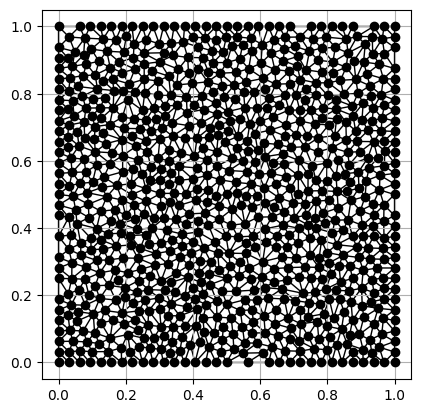

In [7]:
gedim.PlotMesh(mesh)

### High Fidelity approximation

In [8]:
# Block assembly of the matrix
pressure_discreteSpace = { 'Order': 1, 'Type': 1, 'BoundaryConditionsType': [1, 2, 1, 1, 1, 1] }
speed_discreteSpace = { 'Order': 2, 'Type': 1, 'BoundaryConditionsType': [1, 2, 2, 2, 2, 2] }

[pressure_problemData, pressure_dofs, pressure_strongs] = gedim.Discretize(pressure_discreteSpace, lib)
[speed_problemData, speed_dofs, speed_strongs] = gedim.Discretize(speed_discreteSpace, lib)

In [14]:
pressure_n_dofs = pressure_problemData['NumberDOFs']
pressure_n_strongs = pressure_problemData['NumberStrongs']
speed_n_dofs = speed_problemData['NumberDOFs']
speed_n_strongs = speed_problemData['NumberStrongs']

# Pay attention, at the first iteration occures an error, that tells me just to run again to try to obtain the uniqueness

In [15]:
[J_X_1, J_X_D_1] = gedim.AssembleStiffnessMatrix_Shift(speed_problemData['SpaceIndex'], speed_problemData['SpaceIndex'], Stokes_v, 2 * speed_n_dofs + pressure_n_dofs, 2 * speed_n_dofs + pressure_n_dofs, 2 * speed_n_strongs + pressure_n_strongs, 0, 0, 0, lib)
[J_X_2, J_X_D_2] = gedim.AssembleStiffnessMatrix_Shift(speed_problemData['SpaceIndex'], speed_problemData['SpaceIndex'], Stokes_v, 2 * speed_n_dofs + pressure_n_dofs, 2 * speed_n_dofs + pressure_n_dofs, 2 * speed_n_strongs + pressure_n_strongs, speed_n_dofs, speed_n_dofs, speed_n_strongs, lib)

[J_B_1, J_B_D_1] = gedim.AssembleAdvectionMatrix_Shift(speed_problemData['SpaceIndex'], pressure_problemData['SpaceIndex'], Stokes_advection_1, 2 * speed_n_dofs + pressure_n_dofs, 2 * speed_n_dofs + pressure_n_dofs, 2 * speed_n_strongs + pressure_n_strongs, 2 * speed_n_dofs, 0, 0, lib)
[J_B_2, J_B_D_2] = gedim.AssembleAdvectionMatrix_Shift(speed_problemData['SpaceIndex'], pressure_problemData['SpaceIndex'], Stokes_advection_2, 2 * speed_n_dofs + pressure_n_dofs, 2 * speed_n_dofs + pressure_n_dofs, 2 * speed_n_strongs + pressure_n_strongs, 2 * speed_n_dofs, speed_n_dofs, speed_n_strongs, lib)

mu_2 = 2 # Setting the value of mu_2, to produce the forcing term
J_f_1 = gedim.AssembleForcingTerm(Stokes_f_1, speed_problemData, lib)
J_f_2 = gedim.AssembleForcingTerm(Stokes_f_2, speed_problemData, lib)

J_f = np.concatenate([J_f_1, J_f_2, np.zeros(pressure_n_dofs)]) # Concatenaton of the forcing term

p_D = gedim.AssembleStrongSolution(Stokes_pressure_exactSolution, 1, pressure_problemData, lib)

In [16]:
# The solution has u & f, so ...
solution = gedim.LUSolver(J_X_1 + J_X_2 - J_B_1 - J_B_2 - np.transpose(J_B_1) - np.transpose(J_B_2), J_f, lib) # IMmportant be consistent with the sign of B1 and B2

# ... I have to devide it
u = solution[0:2 * speed_n_dofs]
p = solution[2 * speed_n_dofs:]

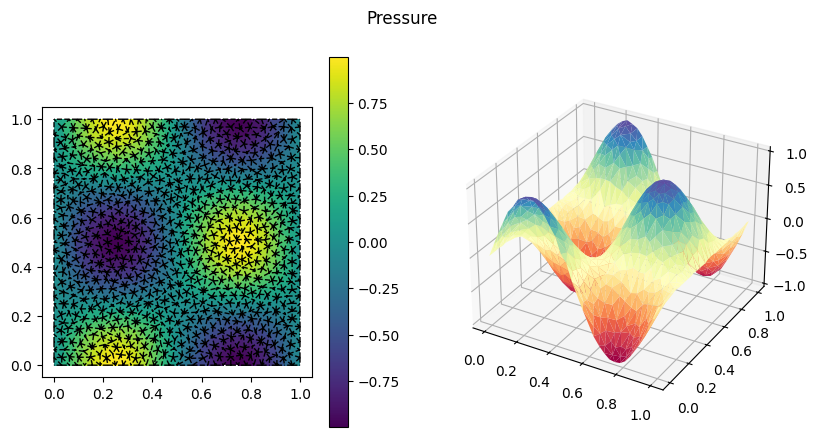

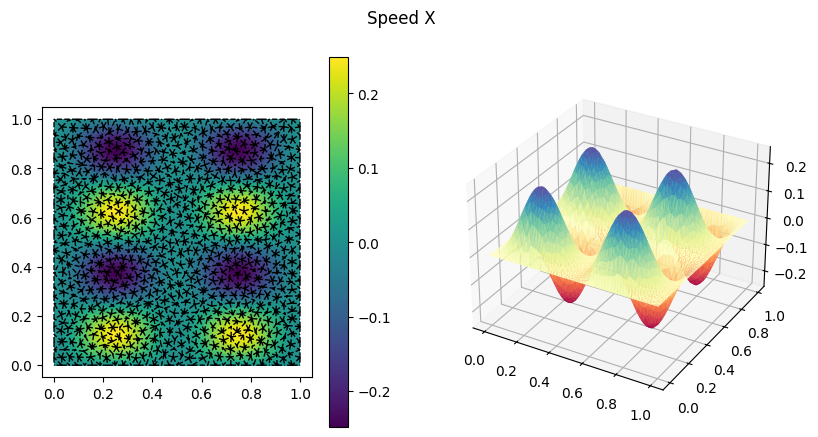

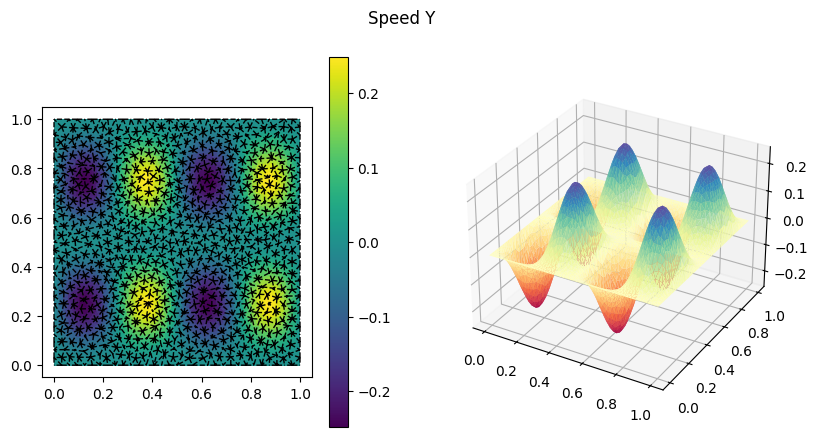

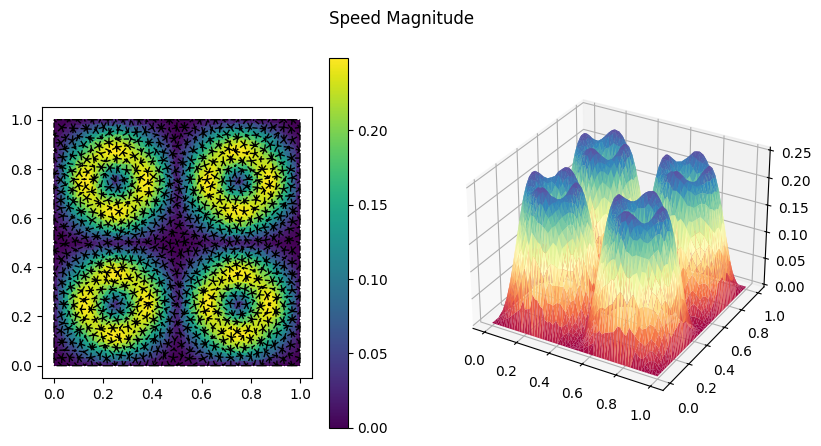

In [17]:
gedim.PlotSolution(mesh, pressure_dofs, pressure_strongs, p, p_D, "Pressure") # No boundary condition

gedim.PlotSolution(mesh, speed_dofs, speed_strongs, u[0:speed_n_dofs], np.zeros(speed_n_strongs), "Speed X")
gedim.PlotSolution(mesh, speed_dofs, speed_strongs, u[speed_n_dofs:], np.zeros(speed_n_strongs), "Speed Y")

# Magnitude sqrt(x^2 + y^2)
gedim.PlotSolution(mesh, speed_dofs, speed_strongs, np.sqrt(u[0:speed_n_dofs] * u[0:speed_n_dofs] + u[speed_n_dofs:] * u[speed_n_dofs:]), np.zeros(speed_n_strongs), "Speed Magnitude")

### Apply in a reduced problem

Let us define the parameters for the POD, i.e. the snapshot number and the parametric space.

In [18]:
### define the training set

snapshot_num = 100
mu1_range = [1., 10.]
mu2_range = [1., 3.]
P = np.array([mu1_range, mu2_range])

training_set = np.random.uniform(low=P[:, 0], high=P[:, 1], size=(snapshot_num, P.shape[0]))

Here, we define the matrices needed to compute the supremizer for each solution of the Stokes problem.

In [19]:
# Assembly stuff for the supermizer

# Assembly stiffness matrix for the 2 component that we have
[X_1, XStrong_1] = gedim.AssembleStiffnessMatrix_Shift(speed_problemData['SpaceIndex'], speed_problemData['SpaceIndex'], Stokes_v, 2 * speed_n_dofs, 2 * speed_n_dofs, 2 * speed_n_strongs, 0, 0, 0, lib)
[X_2, XStrong_2] = gedim.AssembleStiffnessMatrix_Shift(speed_problemData['SpaceIndex'], speed_problemData['SpaceIndex'], Stokes_v, 2 * speed_n_dofs, 2 * speed_n_dofs, 2 * speed_n_strongs, speed_n_dofs, speed_n_dofs, speed_n_strongs, lib)

[B_1, BStrong_1] = gedim.AssembleAdvectionMatrix_Shift(speed_problemData['SpaceIndex'], pressure_problemData['SpaceIndex'], Stokes_advection_1, pressure_n_dofs, 2 * speed_n_dofs, 2 * speed_n_strongs, 0, 0, 0, lib)
[B_2, BStrong_2] = gedim.AssembleAdvectionMatrix_Shift(speed_problemData['SpaceIndex'], pressure_problemData['SpaceIndex'], Stokes_advection_2, pressure_n_dofs, 2 * speed_n_dofs, 2 * speed_n_strongs, 0, speed_n_dofs, speed_n_strongs, lib)

We apply the **partitioned POD** (is more accurate, because you're building the space in a local way). Nemely, we apply a POD for each of the _three_ variables of the Stokes equations. We have three variable: velocity (x and y), pressure and supermizer.

**Question time!** why three?

If we apply three different PODs, we need three different snapshots matrices.
Usually, computing the supremizer for all the pressure modes retained is not feasable (FE offline), thus, we use the _inexact supremizer_, to not computer for every $p$ the inf-sup. We compute the supremizers for the snapshots that we already have and we perform the POD on the supremizer snapshots, too. The basis will be added in the projection phase.

Experimentally has been verified that it is a valid strategy to avoid $N_{\delta}$-dependent computations on the online phase.

_It works, but we do not know why, we have no theorem to tell us that this works._

In [20]:
#### snapshot matrices creation

snapshot_matrix_u = []
snapshot_matrix_s = [] ### supremizer snapshot
snapshot_matrix_p = []

tol = 1. - 1e-7 # Tol for the POD
N_max = 20 # Max20 basis

# The forcing term depends on parameter, so every times needs to be evaluated
for mu in training_set:
    # Setting the parameter
    thetaA1 = mu[0]
    mu_2 = mu[1]
    
    #### the problem is not affine: I have to assemble in this stage!! ###
    J_f_1 = gedim.AssembleForcingTerm(Stokes_f_1, speed_problemData, lib)
    J_f_2 = gedim.AssembleForcingTerm(Stokes_f_2, speed_problemData, lib)
    J_f = np.concatenate([J_f_1, J_f_2, np.zeros(pressure_n_dofs)])
    lhs = thetaA1*(J_X_1 + J_X_2) - J_B_1 - J_B_2 - np.transpose(J_B_1) - np.transpose(J_B_2)
    rhs = J_f
    
    snapshot_solution = gedim.LUSolver(lhs, rhs, lib)

    # Splitting the solutoin u&p
    snapshot_u = snapshot_solution[0:2 * speed_n_dofs]
    snapshot_matrix_u.append(np.copy(snapshot_u))
    
    snapshot_p = snapshot_solution[2 * speed_n_dofs:] # Until the end
    snapshot_matrix_p.append(np.copy(snapshot_p))

    # Solve the system \mathbb X_u \mathsf s^{\mu}(\overline{\psi}_j) = B^T\overline{\psi}_j,
    # X_1 + X_2 _= inner product matrix for the velocity
    # := inner product matrix for the pressure ?? 14:06
    snapshot_s = gedim.LUSolver(X_1 + X_2, np.transpose(B_1 + B_2) @ snapshot_p, lib)
    snapshot_matrix_s.append(np.copy(snapshot_s))
 

snapshot_matrix_u = np.array(snapshot_matrix_u) 

snapshot_matrix_s = np.array(snapshot_matrix_s) 

snapshot_matrix_p = np.array(snapshot_matrix_p) 

For the sake of clarity, let us recall the inner products.

**Question time!** why am I defining only the inner product for the velocity?

In [21]:
inner_product_u = X_1 + X_2

Below, we define a function that, given a covariance matrix (the maximum number of basis functions and a tolerance) computes the related eigenvalues and eigenvectors, returns the eigenvectors and the basis number.

In [22]:
# To solve POD
def eig_analysis(C, N_max=None, tol=1e-9):
  L_e, VM_e = np.linalg.eig(C)
  eigenvalues = []
  eigenvectors = []


  #### check

  for i in range(len(L_e)):
    eig_real = L_e[i].real
    eig_complex = L_e[i].imag
    assert np.isclose(eig_complex, 0.)
    eigenvalues.append(eig_real)
    eigenvectors.append(VM_e[i].real)


  total_energy = sum(eigenvalues)
  retained_energy_vector = np.cumsum(eigenvalues)
  relative_retained_energy = retained_energy_vector/total_energy


  if all(flag==False for flag in relative_retained_energy>= tol) and N_max != None:
    N = N_max
  else:
    N = np.argmax(relative_retained_energy >= tol) + 1
  
  return N, eigenvectors

In [23]:
### covariance matrix

# Supermizer leaves in the space of the velocity
C_u = snapshot_matrix_u @ inner_product_u @ np.transpose(snapshot_matrix_u)
C_s = snapshot_matrix_s @ inner_product_u @ np.transpose(snapshot_matrix_s)
C_p = snapshot_matrix_p @ np.transpose(snapshot_matrix_p)

# Compute eigenvalue analizes
N_u, eigs_u = eig_analysis(C_u, N_max=N_max, tol=tol)
N_s, eigs_s = eig_analysis(C_s, N_max=N_max, tol=tol)
N_p, eigs_p = eig_analysis(C_p, N_max=N_max, tol=tol)

print(N_u, N_s, N_p)

# The dim of the sup is bigger wrt the pressure, has to be in this way!

15 17 16


Now we create a function that creates the basis, given the snapshots matrix, the reduced dimension and the eigenvectors.

In [24]:
# Create the basis function so that every time I can call this 
def create_basis_functions_matrix(N, snapshot_matrix, eigenvectors, inner_product=None):
  
  basis_functions = []
  
  for n in range(N):
    eigenvector =  eigenvectors[n]
    basis = np.transpose(snapshot_matrix)@eigenvector
      
    if inner_product!= None:
      norm = np.sqrt(np.transpose(basis) @ inner_product @ basis) ## metti inner product
    else:
      norm = np.sqrt(np.transpose(basis) @ basis)
        
    basis /= norm # Normalization of the norm
    basis_functions.append(np.copy(basis))

  basis_function_matrix = np.transpose(np.array(basis_functions))

  return basis_function_matrix

We create three separate basis functions and then the global basis function that we need for the projection:

$$\mathbb {B} = 
\begin{bmatrix} \mathbb B_u \cup \mathbb B_s & 0\\
0 & \mathbb B_p
\end{bmatrix}.$$


In [25]:
basis_functions_u = create_basis_functions_matrix(N_u, snapshot_matrix_u, eigs_u, inner_product=inner_product_u) # Velocity
basis_functions_s = create_basis_functions_matrix(N_s, snapshot_matrix_s, eigs_s, inner_product=inner_product_u) # Super
basis_functions_p = create_basis_functions_matrix(N_p, snapshot_matrix_p, eigs_p) # Pressure, no inner_product because the norm are equivalent in L^2 and l^2

In [26]:
# To understand the dimension
print(basis_functions_u.shape)
print(basis_functions_p.shape)
print(basis_functions_u.shape[0] + basis_functions_p.shape[0])
print(basis_functions_p.shape)
print(solution.shape)

# In row the FOM dimension, in columns the dim is N_u + N_s + N_p
global_basis_function_matrix = np.zeros((basis_functions_u.shape[0] + basis_functions_p.shape[0],N_u + N_s + N_p))
global_basis_function_matrix[0:basis_functions_u.shape[0], 0:N_u] = basis_functions_u
global_basis_function_matrix[0:basis_functions_u.shape[0], N_u : N_u + N_s] = basis_functions_s
global_basis_function_matrix[basis_functions_u.shape[0]:, N_u + N_s:] = basis_functions_p
print(global_basis_function_matrix.shape)

global_basis_function_matrix_no_sipremizer = np.zeros((basis_functions_u.shape[0] + basis_functions_p.shape[0],N_u + N_p))
global_basis_function_matrix_no_sipremizer[0:basis_functions_u.shape[0], 0:N_u] = basis_functions_u
global_basis_function_matrix_no_sipremizer[basis_functions_u.shape[0]:, N_u:] = basis_functions_p

(5932, 15)
(826, 16)
6758
(826, 16)
(6758,)
(6758, 48)


We now define the assemble-functions

In [27]:
# Assemble the reduce matrix and vector

def assemble_reduced_matrix(basis, fom_matrix):
  return np.transpose(basis) @ (fom_matrix) @ basis

def assemble_reduced_vector(basis, fom_vector):
  return np.transpose(basis) @ (fom_vector)

Let us finish the offline phase

In [28]:
### ASSEMBLE REDUCED SYSTEMS -- the stiffness part
# global_basis_function_matrix --> Means with supervisor
reduced_stiff_Stokes = assemble_reduced_matrix(global_basis_function_matrix, (J_X_1 + J_X_2)) 
reduced_divergence_operator_1 = assemble_reduced_matrix(global_basis_function_matrix, (J_B_1)) 
reduced_divergence_operator_2 = assemble_reduced_matrix(global_basis_function_matrix, (J_B_2))

We are ready for a new evaluation!

In [29]:
### New eval
thetaA1 = 1
mu_2 = 2
J_f_1 = gedim.AssembleForcingTerm(Stokes_f_1, speed_problemData, lib)
J_f_2 = gedim.AssembleForcingTerm(Stokes_f_2, speed_problemData, lib)
J_f = np.concatenate([J_f_1, J_f_2, np.zeros(pressure_n_dofs)])
reduced_lhs = thetaA1*reduced_stiff_Stokes - reduced_divergence_operator_1 - reduced_divergence_operator_2 - np.transpose(reduced_divergence_operator_1) - np.transpose(reduced_divergence_operator_2)
reduced_rhs = assemble_reduced_vector(global_basis_function_matrix, J_f)

In [30]:
reduced_solution = np.linalg.solve(reduced_lhs, reduced_rhs)
print(reduced_solution)

[ 1.53168700e+00  1.71340025e+00  4.41638463e-02 -3.74098315e+00
 -4.61737191e+00 -6.58202057e+00 -3.90406493e+00  7.52625495e+00
  3.64862676e+00  4.67181951e-02  1.29264119e+00  5.29001165e+00
  8.36226243e-01 -6.53416099e-01  2.37774077e+00  3.11482581e-01
  2.00500088e-01 -1.49746728e-01 -1.57121855e+00 -1.02027950e+00
 -2.10385952e+00  2.70268861e+00  2.08099400e+00 -2.19828809e+00
  2.26645866e+00 -9.94293021e-01 -6.25165848e-01  1.41432050e+00
 -9.24859852e-02 -1.85273521e+00 -2.67381826e+00  1.14289927e+00
 -1.24170413e+02  2.56934110e+02  1.60515598e+02  4.07738000e+02
  4.46819677e+02 -6.14992648e+01 -7.29116000e+02 -3.06138195e+02
 -1.06606410e+02  1.67680498e+01 -1.52025523e+02  1.86020192e+02
  3.86810386e+01  1.06040155e+03  6.24418320e+01  1.95499818e+02]


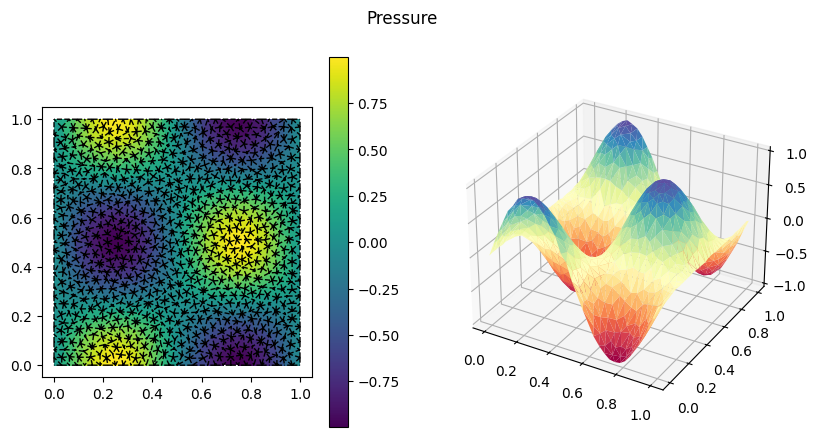

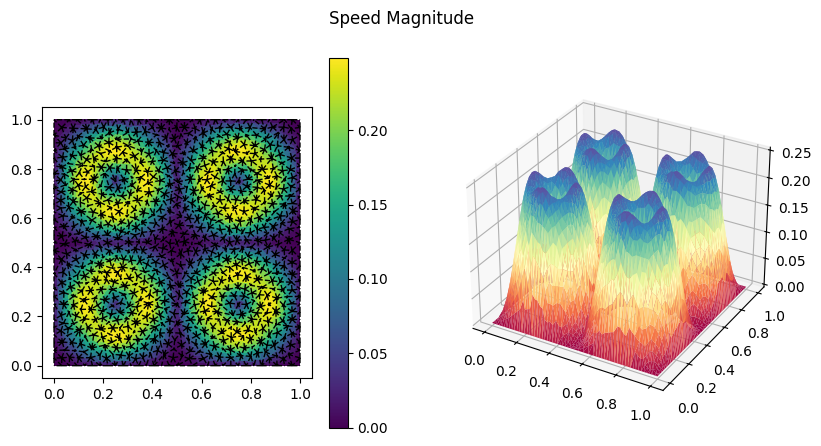

In [31]:
###### plot #######
reduced_u_dof = N_u + N_s # Splitting the reduced dimension
# reduced_p_dof = N_p

# Take the reduce solution, take in the finite element space, split in u and p
reduced_solution_FE_basis = global_basis_function_matrix @ reduced_solution # Lookig the reduced solution in the finite element space
reduced_u = reduced_solution_FE_basis[0:2*speed_n_dofs]
reduced_p = reduced_solution_FE_basis[2*speed_n_dofs:]

gedim.PlotSolution(mesh, pressure_dofs, pressure_strongs, reduced_p, p_D, "Pressure")
gedim.PlotSolution(mesh, speed_dofs, speed_strongs, np.sqrt(reduced_u[0:speed_n_dofs] * reduced_u[0:speed_n_dofs] + reduced_u[speed_n_dofs:] * reduced_u[speed_n_dofs:]), np.zeros(speed_n_strongs), "Speed Magnitude")

Quite similar to the FOM version that we saw in previuously.

**What happens without supremizer?**

In [32]:
### NO SUPREMIZER
reduced_stiff_Stokes_nsup = assemble_reduced_matrix(global_basis_function_matrix_no_sipremizer, (J_X_1 + J_X_2)) # np.transpose(global_basis_function_matrix) @ (J_X_1 + J_X_2) @ global_basis_function_matrix
reduced_divergence_operator_1_nsup = assemble_reduced_matrix(global_basis_function_matrix_no_sipremizer, (J_B_1)) #np.transpose(global_basis_function_matrix) @ J_B_1 @ global_basis_function_matrix
reduced_divergence_operator_2_nsup = assemble_reduced_matrix(global_basis_function_matrix_no_sipremizer, (J_B_2))
# - J_B_1 - J_B_2

In [33]:
### New eval
reduced_lhs = thetaA1*reduced_stiff_Stokes_nsup - reduced_divergence_operator_1_nsup - reduced_divergence_operator_2_nsup - np.transpose(reduced_divergence_operator_1_nsup) - np.transpose(reduced_divergence_operator_2_nsup)
reduced_rhs = assemble_reduced_vector(global_basis_function_matrix_no_sipremizer, J_f)

In [34]:
reduced_solution = np.linalg.solve(reduced_lhs, reduced_rhs)
print(reduced_solution)

[-1.22599857e-04 -3.75556218e-04 -5.36698413e-05  1.62163932e-04
 -1.06872997e-04 -3.49512199e-04  3.46797238e-05  9.10062365e-06
  2.28828702e-04  1.36738079e-04  2.90670169e-04  1.99308032e-04
 -3.36178579e-05 -1.01867427e-04 -1.83587234e-05 -1.27762862e+16
 -2.14627584e+18  1.00865123e+18 -1.77081707e+18  3.40871820e+17
  2.74944661e+18 -2.20492633e+18  1.02038556e+19 -5.15240419e+18
 -6.52465826e+17  1.77755105e+17  2.62888744e+18 -1.14610056e+18
 -1.35660305e+19  6.26354038e+16 -6.69149742e+18]


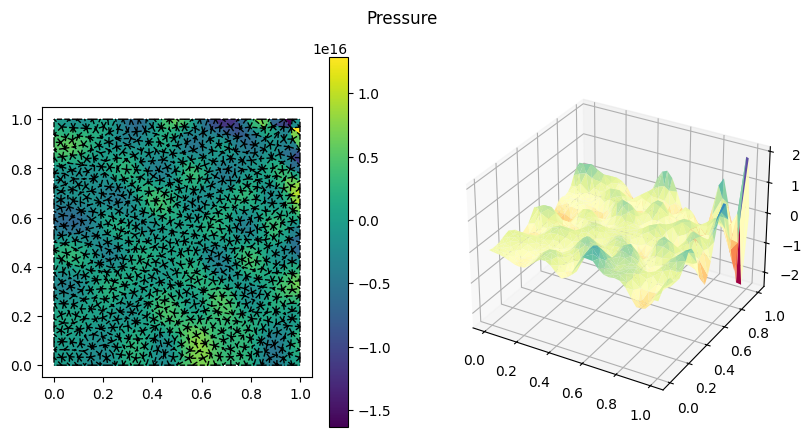

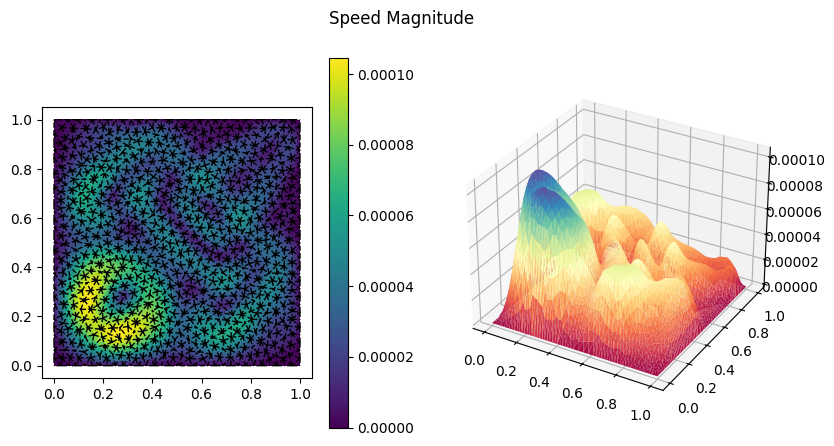

In [35]:
###### plot #######
reduced_u_dof = N_u + N_s
# reduced_p_dof = N_p
reduced_solution_FE_basis = global_basis_function_matrix_no_sipremizer @ reduced_solution
reduced_u = reduced_solution_FE_basis[0:2*speed_n_dofs]
reduced_p = reduced_solution_FE_basis[2*speed_n_dofs:]

gedim.PlotSolution(mesh, pressure_dofs, pressure_strongs, reduced_p, p_D, "Pressure")
gedim.PlotSolution(mesh, speed_dofs, speed_strongs, np.sqrt(reduced_u[0:speed_n_dofs] * reduced_u[0:speed_n_dofs] + reduced_u[speed_n_dofs:] * reduced_u[speed_n_dofs:]), np.zeros(speed_n_strongs), "Speed Magnitude")

Here the result are NOT good! We're solving a total different system, that is unstable!! This is why we have to use the supermizer operator!!


Let us analyze the usual stuff: errors and speedups!
Below you find a function that computes the error.

In [39]:
######### def error functions ######

# Compute the error for the solution, we want to compute separate error for velocity and for pressure
def compute_error(fom_solution, rom_solution_FE_basis, inner_product=None, type_err="relative"):
    
    error_function_u = fom_solution - rom_solution_FE_basis
    
    if inner_product == None:
        inner_product_matrix = np.identity(fom_solution.shape[0])
    else:
      # print()
      inner_product_matrix = inner_product
    
    error_norm_squared_component = np.transpose(error_function_u) @ inner_product_matrix @ error_function_u
    absolute_error = np.sqrt(abs(error_norm_squared_component))
    
    if type_err == "absolute":
      
      return absolute_error
    
    else:
      full_solution_norm_squared_component = np.transpose(fom_solution) @  inner_product_matrix @ fom_solution
      relative_error = absolute_error/np.sqrt(abs(full_solution_norm_squared_component))
    
      return relative_error

In [40]:
### compute error - As always
import time

abs_err_u = []
rel_err_u = []

abs_err_p = []
rel_err_p = []

testing_set = np.random.uniform(low=P[:, 0], high=P[:, 1], size=(100, P.shape[0]))
speed_up = []

print("Computing error and speedup analysis")

for mu in testing_set:
  
  thetaA2 = mu[0]
  thetaf1 = mu[1]

  ##### full #####
  thetaA1 = mu[0]
  mu_2 = mu[1]
  
  #### the problem is not affine: I have to assemble in this stage!! ###
  start_time_assemble = time.time()
  J_f_1 = gedim.AssembleForcingTerm(Stokes_f_1, speed_problemData, lib)
  J_f_2 = gedim.AssembleForcingTerm(Stokes_f_2, speed_problemData, lib)
  J_f = np.concatenate([J_f_1, J_f_2, np.zeros(pressure_n_dofs)])
  time_assemble = time.time() - start_time_assemble
  lhs = thetaA1*(J_X_1 + J_X_2) - J_B_1 - J_B_2 - np.transpose(J_B_1) - np.transpose(J_B_2)
  rhs = J_f
  
  start_fom = time.time()
  full_solution = gedim.LUSolver(lhs, rhs, lib)
  time_fom = time.time() - start_fom

  full_solution_u = full_solution[0:2*speed_n_dofs]
  full_solution_p = full_solution[2*speed_n_dofs:]

  #### reduced #####

  reduced_lhs = thetaA1*reduced_stiff_Stokes - reduced_divergence_operator_1 - reduced_divergence_operator_2 - np.transpose(reduced_divergence_operator_1) - np.transpose(reduced_divergence_operator_2)
  reduced_rhs = assemble_reduced_vector(global_basis_function_matrix, J_f)
  
  start_rom = time.time()
  reduced_solution = np.linalg.solve(reduced_lhs, reduced_rhs)
  time_rom = time.time() - start_rom
  
  speed_up.append(time_fom/(time_rom+time_assemble))
  
  reduced_solution_FE_basis = global_basis_function_matrix @ reduced_solution
  reduced_u_FE = reduced_solution_FE_basis[0:2*speed_n_dofs]
  reduced_p_FE = reduced_solution_FE_basis[2*speed_n_dofs:]

  ### computing error
  
  abs_err_u_mu = compute_error(full_solution_u, reduced_u_FE, inner_product=inner_product_u, type_err="absolute")
  rel_err_u_mu = compute_error(full_solution_u, reduced_u_FE, inner_product=inner_product_u)
  abs_err_u.append(abs_err_u_mu)
  rel_err_u.append(rel_err_u_mu)

  abs_err_p_mu = compute_error(full_solution_p, reduced_p_FE, type_err="absolute")
  rel_err_p_mu = compute_error(full_solution_p, reduced_p_FE)
  abs_err_p.append(abs_err_p_mu)
  rel_err_p.append(rel_err_p_mu)

Computing error and speedup analysis


In [41]:
print("avarege relative error for velocity = ", np.mean(rel_err_u) )
print("avarege absolute error for velocity = ", np.mean(abs_err_u) )

print("avarege relative error for pressure = ", np.mean(rel_err_p) )
print("avarege absolute error for pressure = ", np.mean(abs_err_p) )


print("avarege speed_up = ", np.mean(speed_up) )

avarege relative error for velocity =  0.0010288460443136228
avarege absolute error for velocity =  0.0004980000973651054
avarege relative error for pressure =  0.001996658155844279
avarege absolute error for pressure =  0.12628379048684
avarege speed_up =  1.180798052531655
